# Loan Application Status Prediction

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_loan = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We can see that there are 614 rows and 13 columns in our dataset. In our problem statement we are asked to predict the 'loan status' which is the target label and the remaining columns are our features making this a Classification problem.

## Shape of data with number of rows and columns


In [3]:
df_loan.shape

(614, 13)

There are 614 rows and 13 columns in dataset

In [4]:
#checking column names
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#checking the datatype information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the above cell, there are 8 columns with object datatype , 1 column with integer datatype and 4 columns that have float datatype.

## Statistical Analysis

In [6]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- count for all the columns are not same, so, missing data is present in the dataset.
- mean is greater than median in ApplicantIncome, so data might be right skewed.
- std is higher in ApplicantIncome and CoapplicantIncome, so, data might be spreaded.
- Large difference between 75th percentile and max is present in ApplicantIncome and CoapplicantIncome. There might be some outliers.

## Datatypes of all columns

In [7]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History columns are having float datatype. ApplicantIncome        column is having integer datatype and rest of the columns are having object datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

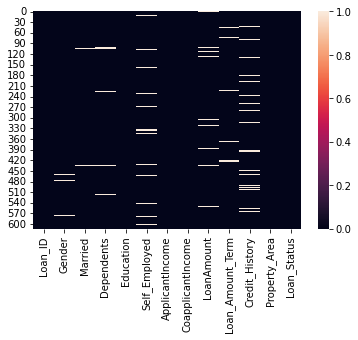

In [9]:
#To check missing values using heatmap
sns.heatmap(df_loan.isnull())

We see that there are missing values in our dataset. For missing values in categorical columns, we will fill them with mode; and for continuous columns we will fill them with mean.

In [10]:
#checking unique values
df_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In the above cell, we can see the number of unique values each columns contains.

In [11]:
#getting the list of float data type column names
num_data = []
for x in df_loan.dtypes.index:
    if df_loan.dtypes[x] == 'float64' or df_loan.dtypes[x] == 'int64':
        num_data.append(x)
print(f"Continuous Columns:\n", num_data)

#getting list of object data type column names
obj_data = []
for x in df_loan.dtypes.index:
    if df_loan.dtypes[x] == 'object':
        obj_data.append(x)
print(f"Categorical Columns:\n", obj_data)

Continuous Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [12]:
from sklearn.impute import SimpleImputer

#Filling the missing values in categorical columns with mode
imp = SimpleImputer(strategy = "most_frequent")

df_loan['Gender']=imp.fit_transform(df_loan['Gender'].values.reshape(-1,1))
df_loan['Married']=imp.fit_transform(df_loan['Married'].values.reshape(-1,1))
df_loan['Dependents']=imp.fit_transform(df_loan['Dependents'].values.reshape(-1,1))
df_loan['Self_Employed']=imp.fit_transform(df_loan['Self_Employed'].values.reshape(-1,1))
df_loan['Loan_Amount_Term']=imp.fit_transform(df_loan['Loan_Amount_Term'].values.reshape(-1,1))
df_loan['Credit_History']=imp.fit_transform(df_loan['Credit_History'].values.reshape(-1,1))

#filling the missing values in continuous columns with mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_loan['LoanAmount']=imp.fit_transform(df_loan['LoanAmount'].values.reshape(-1,1))

In [13]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In the above cell, we can see that there are no null values present in the dataset now.

In [14]:
#dropping the loan_ID column as it is just a list of unique identifiers and is not adding much insight into the prediction of our target label
df_loan.drop("Loan_ID", axis=1, inplace=True)

In [15]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

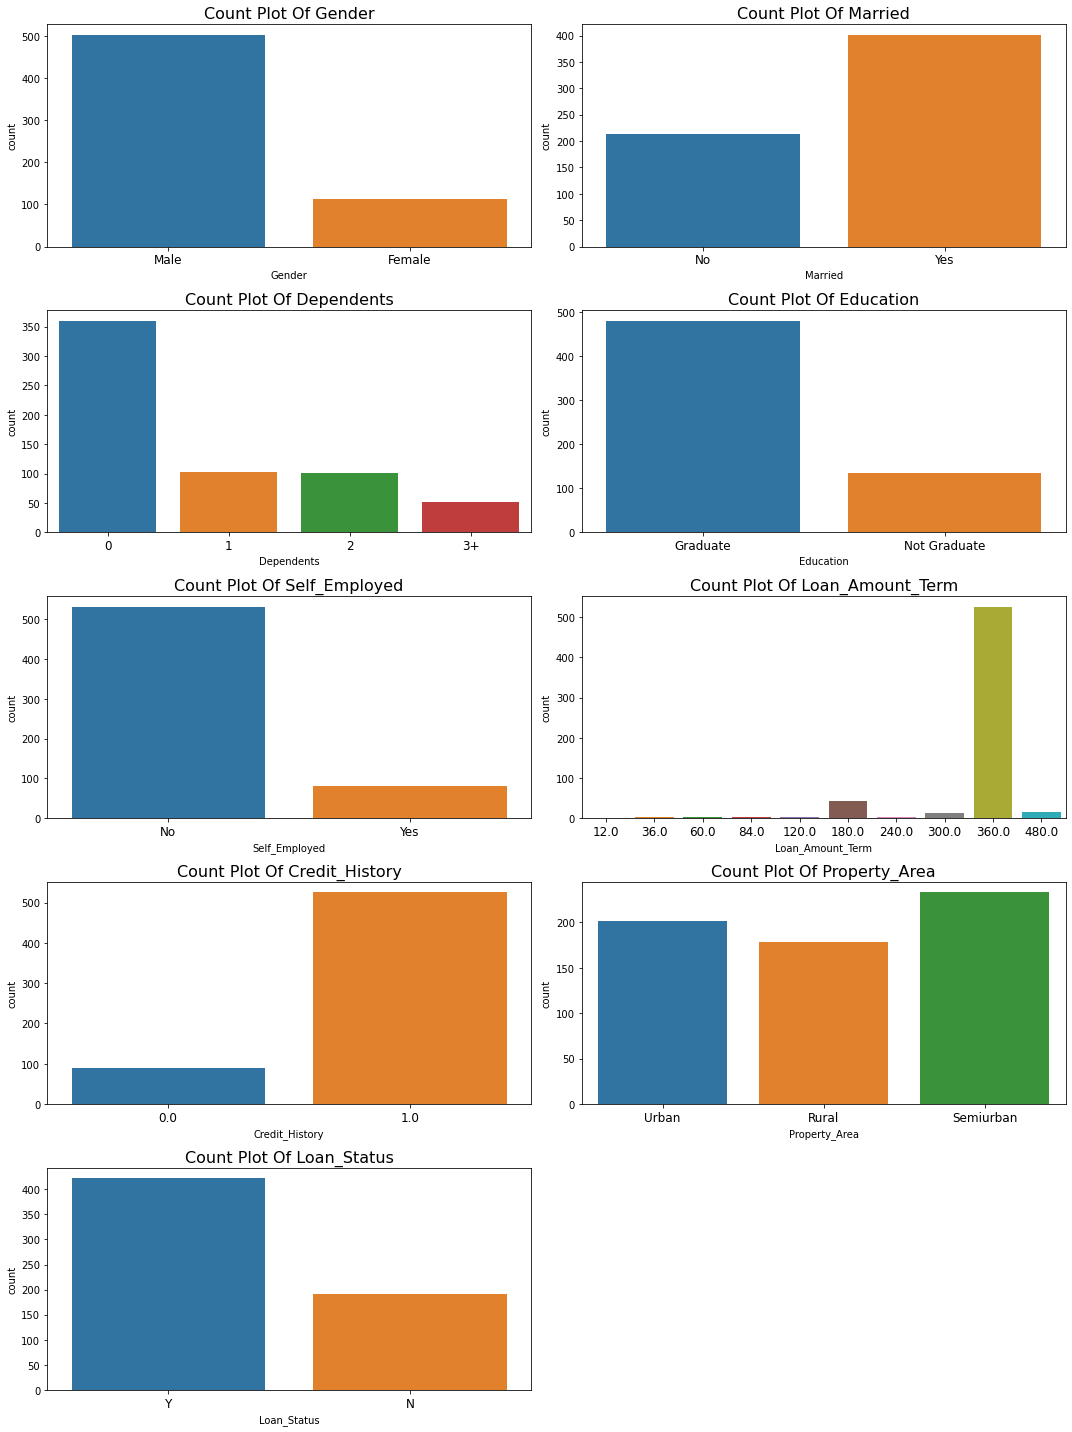

In [16]:
#Checking the countplots for the feature columns
col0=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History',
      'Property_Area','Loan_Status']

#plotting the plots
plt.figure(figsize=(15,20))
for i in range(len(col0)):
    plt.subplot(5,2,i+1)
    sns.countplot(df_loan[col0[i]])
    plt.title(f"Count Plot Of {col0[i]}",fontsize=16)
    plt.xticks(fontsize=12)
    plt.tight_layout()

- From Gender, we can say the count of male is higher than female.
- From married countplot,we can say there are more married people as compared to single.
- From Countplot of dependents, we can say 0 has highest count and 3+ has the lowest count.
- The countplot of Education shows that people who are graduated are having more and people who are not graduated are having less count.
- From Countplot of Self_employed, we see that people who are not self employed have high count as compare to self employed people.
- From countplot of Loan_Amount_Term, 360 has the highest count.
- Countplot of credit history shows 1 has high count and 0 has less count
- From Countplot of property area, semi-urban has the highest count followed by Urban , and rural has least count.
- From Countplot of loan_status, we see that Yes has higher count than NO.

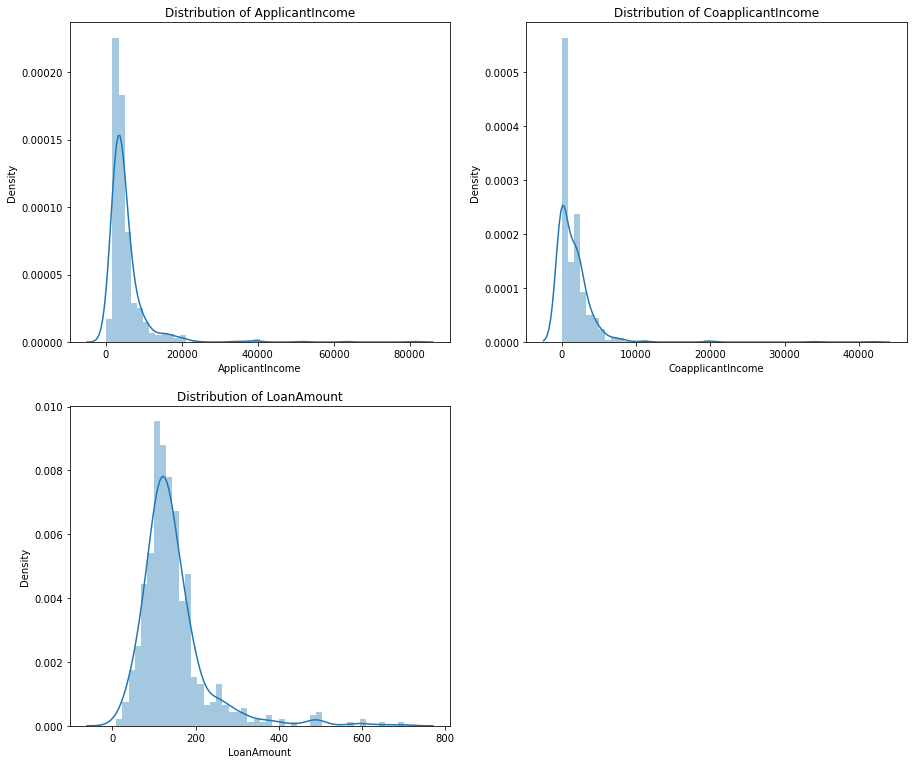

In [17]:
#Checking distribution plot 
col1=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(15,20))
for i in range(len(col1)):
    plt.subplot(3,2,i+1)
    sns.distplot(df_loan[col1[i]])
    plt.title(f"Distribution of {col1[i]}")

From the above distplot, we can see that data has some amount of skewness.

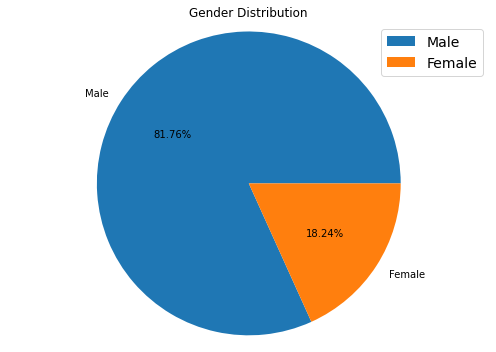

In [18]:
#checking pie-chart for feature columns
plt.figure(figsize=(7,5))
plt.pie(df_loan['Gender'].value_counts(), labels=df_loan['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart, we can see that the number of males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.

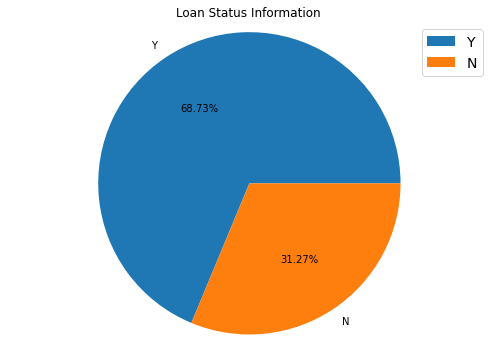

In [19]:
plt.figure(figsize=(7,5))
plt.pie(df_loan['Loan_Status'].value_counts(), labels=df_loan['Loan_Status'].value_counts().index, autopct='%1.2f%%')
plt.title('Loan Status Information')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we see that our target label has 68.73% of loan approved status while 31.27% of loan rejected status. This indicates a class imbalance that we will treat before building our ML models.

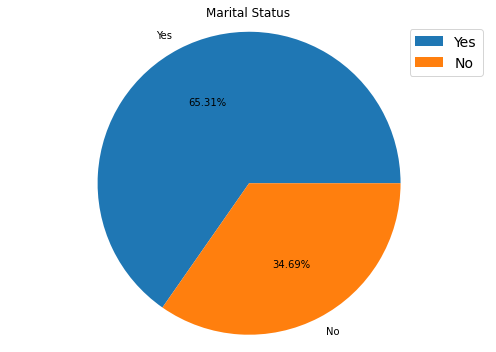

In [20]:
plt.figure(figsize=(7,5))
plt.pie(df_loan['Married'].value_counts(), labels=df_loan['Married'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital Status')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that married people occupy 65.31% of rows and the remaining 34.69% of rows are filled with unmarried people.

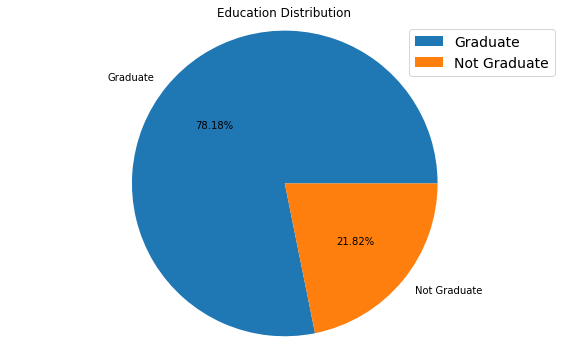

In [21]:
plt.figure(figsize=(8,5))
plt.pie(df_loan['Education'].value_counts(), labels=df_loan['Education'].value_counts().index, autopct='%1.2f%%')
plt.title('Education Distribution')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we can see that 78.18% of rows present in Education column are filled with graduates while the remaining 21.82% rows are filled with under graduate people.

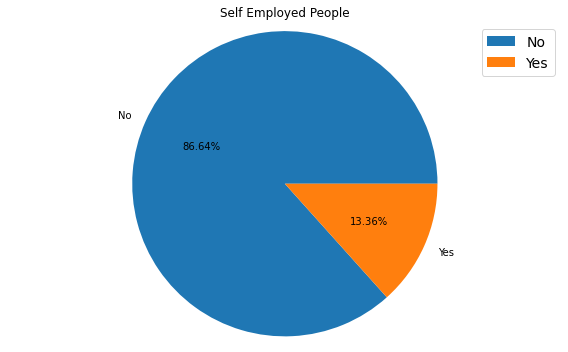

In [22]:
plt.figure(figsize=(8,5))
plt.pie(df_loan['Self_Employed'].value_counts(), labels=df_loan['Self_Employed'].value_counts().index, autopct='%1.2f%%')
plt.title('Self Employed People')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see that 86.64% people are not self employed or might be working with either private or government sectors while only 13.36% people are self employed having their own business.

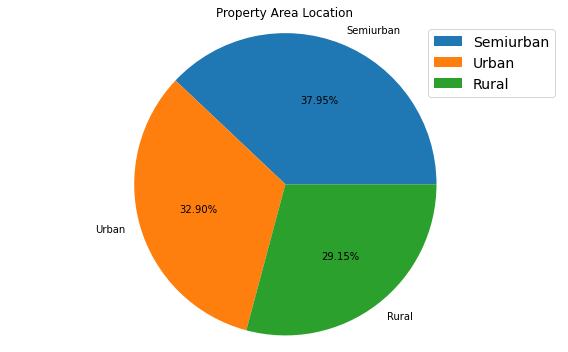

In [23]:
plt.figure(figsize=(8,5))
plt.pie(df_loan['Property_Area'].value_counts(), labels=df_loan['Property_Area'].value_counts().index, autopct='%1.2f%%')
plt.title('Property Area Location')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see from the plot above that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type.

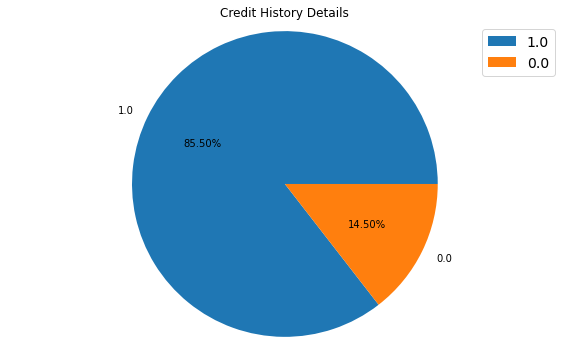

In [24]:
plt.figure(figsize=(8,5))
plt.pie(df_loan['Credit_History'].value_counts(), labels=df_loan['Credit_History'].value_counts().index, autopct='%1.2f%%')
plt.title('Credit History Details')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we observe that 1.0 represent that credit history is available and 0.0 represent that credit history is not available. For 85.50% of people,we have the credit history information available while 14.50% people do not have any credit history.

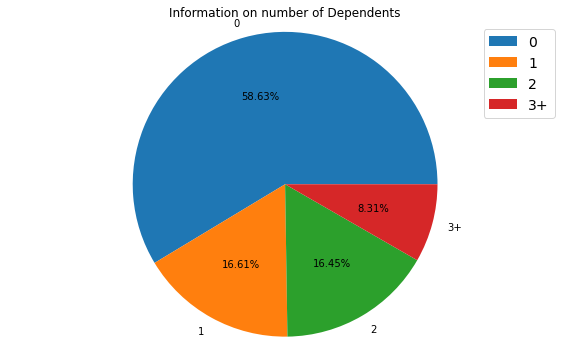

In [25]:
plt.figure(figsize=(8,5))
plt.pie(df_loan['Dependents'].value_counts(), labels=df_loan['Dependents'].value_counts().index, autopct='%1.2f%%')
plt.title('Information on number of Dependents')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

It shows the total number of dependants where 56.63% rows are covered with people having 0 dependents, 16.61% rows covered with people having 1 dependent, 16.45% rows covered with people having 2 dependents and 8.31% rows covered with people having 3 or more dependents.

### Bivariate Analysis

Bivariate Analysis works with two variables.

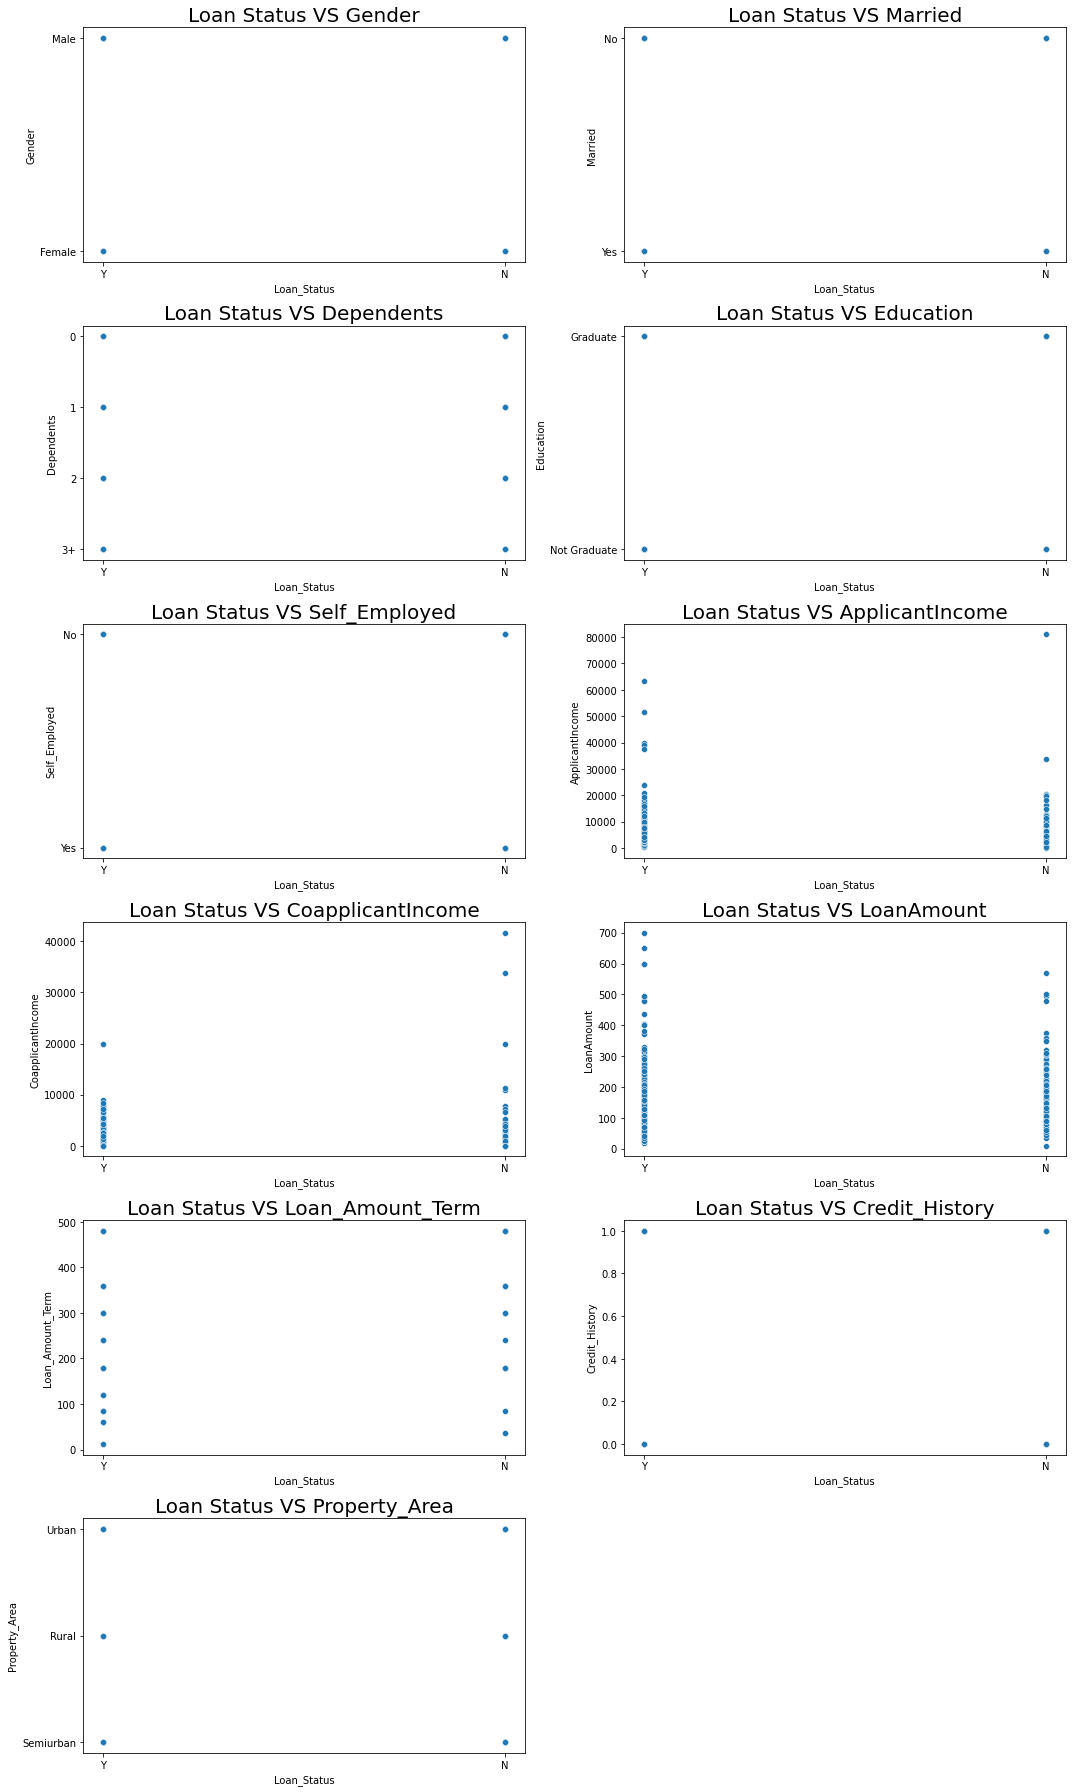

In [26]:
#checking the relationship between target column and other feature columns using scatterplot
col2=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plt.figure(figsize=(15,25))
for i in range(len(col2)):
    plt.subplot(6,2,i+1)
    sns.scatterplot(x=df_loan['Loan_Status'],y=df_loan[col2[i]])
    plt.title(f"Loan Status VS {col2[i]}",fontsize=20)
    plt.tight_layout()

- From applicantincome and loan status, we see that people whose income is high take less loan and people earning less take more loans.
- From coapplicantincome We can say there are more the people who dont want loan.
- From loanamount we can say people with loan status Yes are high as compared to No loan.

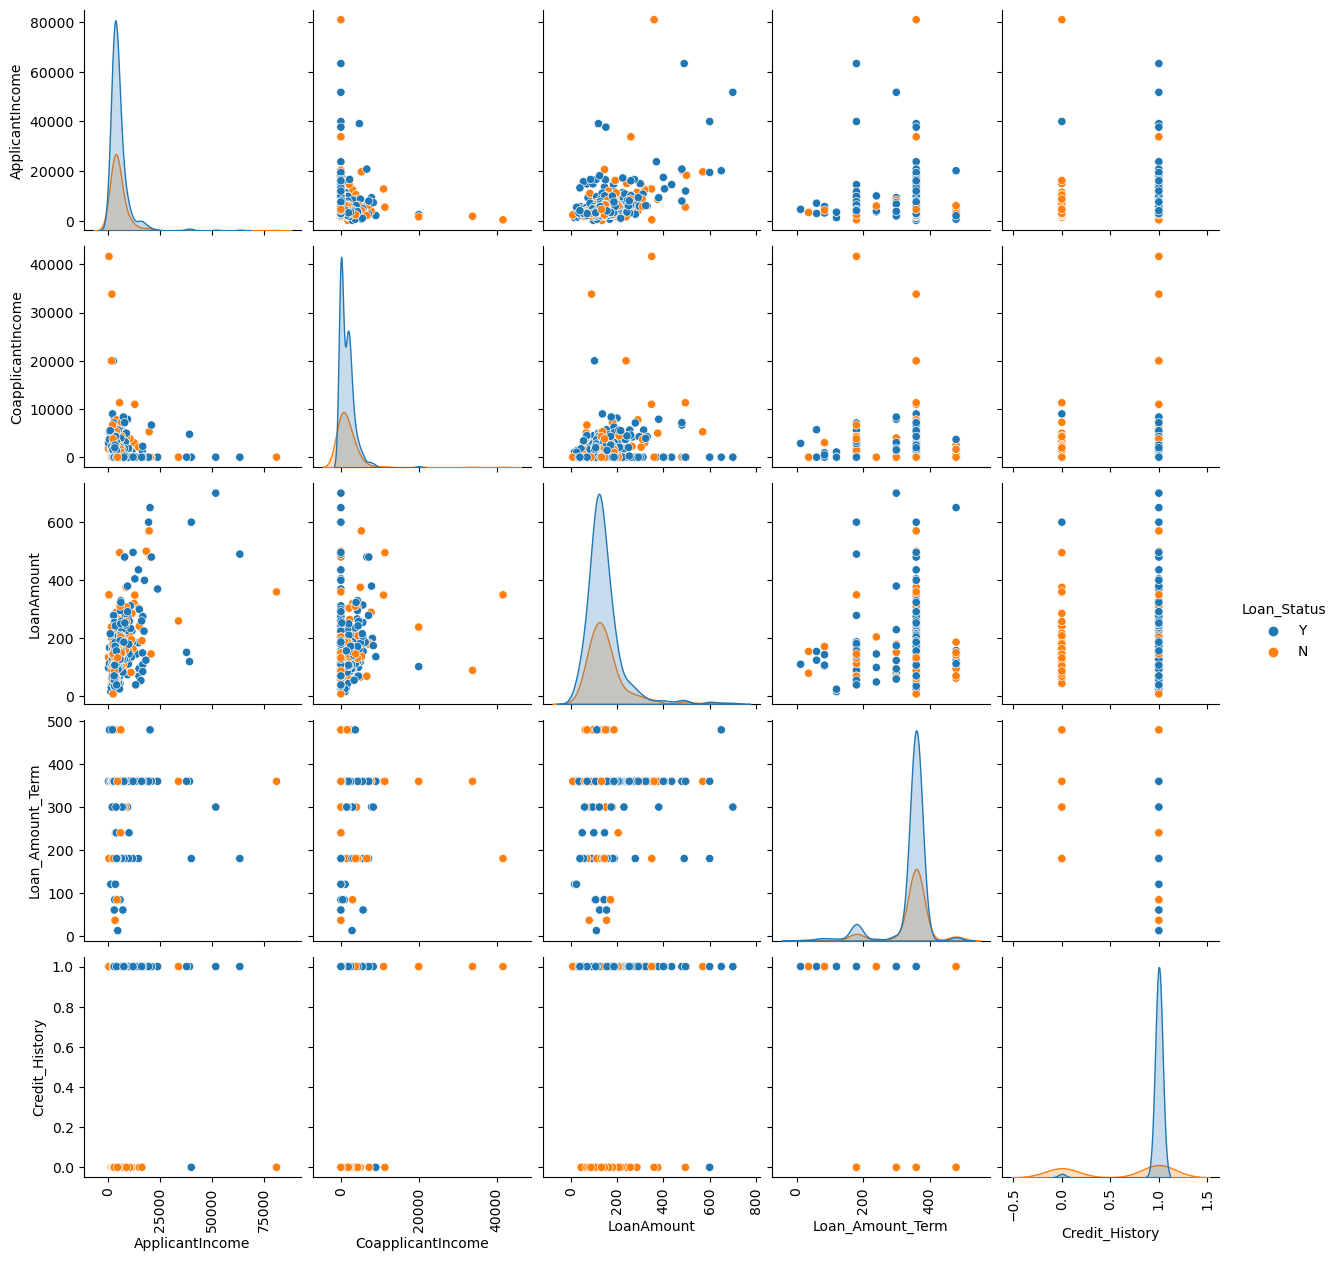

In [27]:
#Checking pairplot
plt.style.use('default')
g = sns.pairplot(df_loan, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

Here we have generated the above pairplot for our continous data columns that shows us how the data points are distributed in each of the numeric datatype columns.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

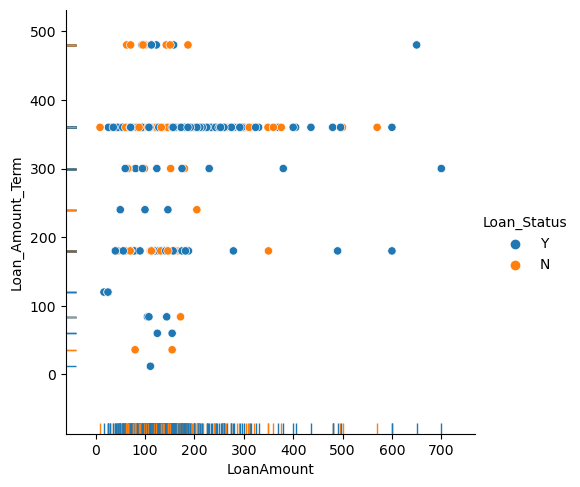

In [28]:
sns.relplot(data=df_loan, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df_loan, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

In the above loan amount vs loan amount term plot, we see that most of the data points are accumulated for 180, 300, 340, 360 and 480 terms while loan amount ranging from 50-250 for a term of 480 mostly seems to be getting rejected than approved.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

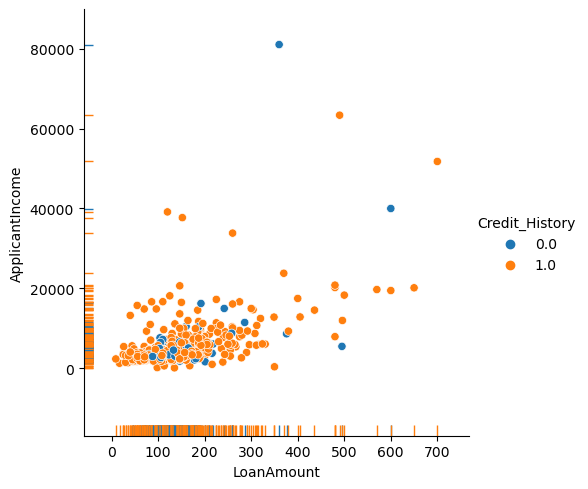

In [29]:
sns.relplot(data=df_loan, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df_loan, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

Here we see that most of the data points have their credit history available and the values are converged between 0-20000 for applicant income and 0-400 for loan amount data.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

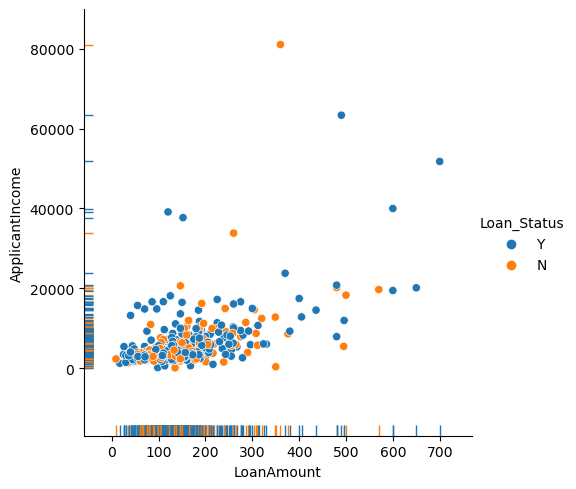

In [30]:
sns.relplot(data=df_loan, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df_loan, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

Here we can see that most of the data points are converged near the range 0-20000 data for Applicant Income for loan amount between 0-400

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

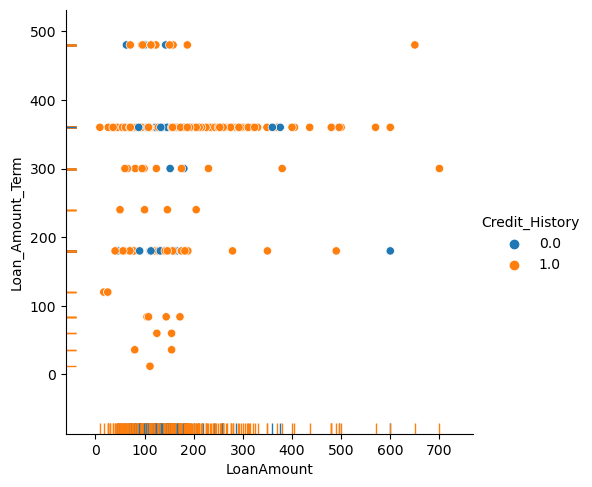

In [31]:
sns.relplot(data=df_loan, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df_loan, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

In the above plot we can see that in loan amount vs loan amount term data, most of the values already have a credit history to showcase.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

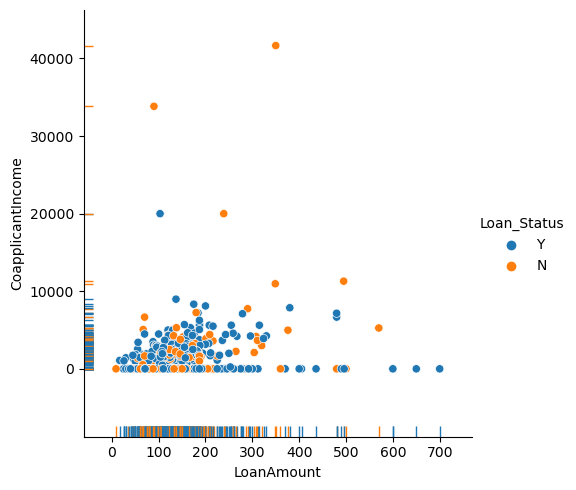

In [32]:
sns.relplot(data=df_loan, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df_loan, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

Here we see the co-applicant income vs loan amount data points where co-applicants with higher income are mostly denied loan where most data values are converged between 0-10000 for co-applicant income and 0-300 for loan amount data.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

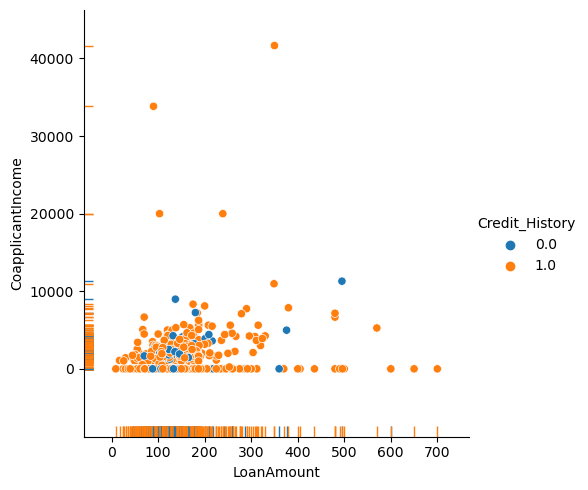

In [33]:
sns.relplot(data=df_loan, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df_loan, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

From the above plot, we can see that most of the data points are accumulated between 0-10000 for co applicant income and 0-350 for loan amount data and most of these data points have a credit history available for them.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

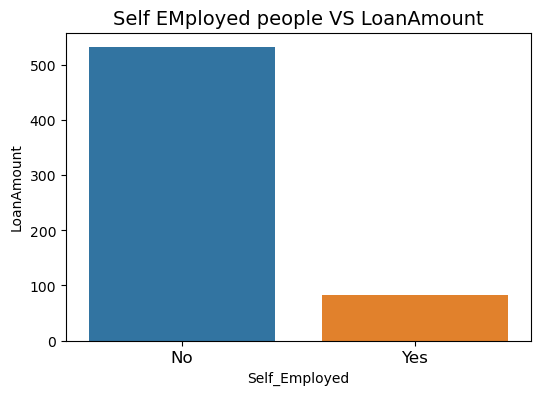

In [34]:
#Checking barplot
df1_loan=df_loan.groupby('Self_Employed')['LoanAmount'].count()
df1_loan=df1_loan.reset_index()
df1_loan=df1_loan.sort_values(by=('LoanAmount'),ascending=False)

plt.figure(figsize=(6,4))
plt.title("Self EMployed people VS LoanAmount",fontsize=14)
sns.barplot(x='Self_Employed',y='LoanAmount',data=df1_loan)
plt.xticks(fontsize=12)

Here we can see that people who are Not self-employed are taking loans of more amount than those who are self-employed.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '36.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '84.0'),
  Text(4, 0, '120.0'),
  Text(5, 0, '180.0'),
  Text(6, 0, '240.0'),
  Text(7, 0, '300.0'),
  Text(8, 0, '360.0'),
  Text(9, 0, '480.0')])

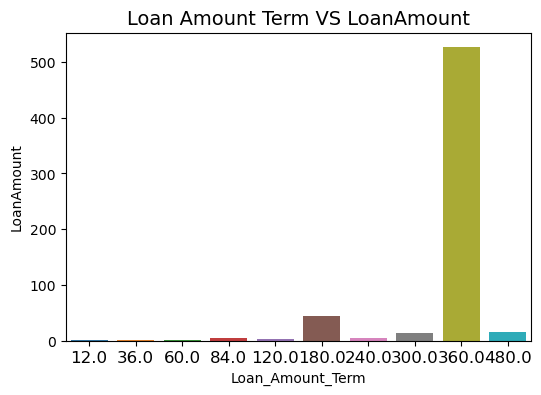

In [35]:
df2_loan=df_loan.groupby('Loan_Amount_Term')['LoanAmount'].count()
df2_loan=df2_loan.reset_index()
df2_loan=df2_loan.sort_values(by=('LoanAmount'),ascending=False)

plt.figure(figsize=(6,4))
plt.title("Loan Amount Term VS LoanAmount",fontsize=14)
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=df2_loan)
plt.xticks(fontsize=12)

 In the above plot we can see that the highest number of rows are covered by the value 360.0 in the "Loan_Amount_Term" column.

Text(0.5, 1.0, 'AREA VS Loan Amount')

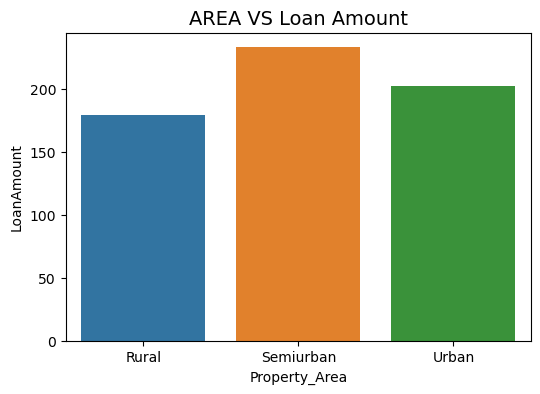

In [36]:
df3_loan=df_loan.groupby('Property_Area')['LoanAmount'].count()
df3_loan=df3_loan.reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Property_Area',y='LoanAmount',data=df3_loan)
plt.title("AREA VS Loan Amount",fontsize=14)

From the above plot, we can say people from semiurban take more loan than rural and urban.

<AxesSubplot:title={'center':'Loanamount VS CoapplicantIncome'}, xlabel='CoapplicantIncome', ylabel='LoanAmount'>

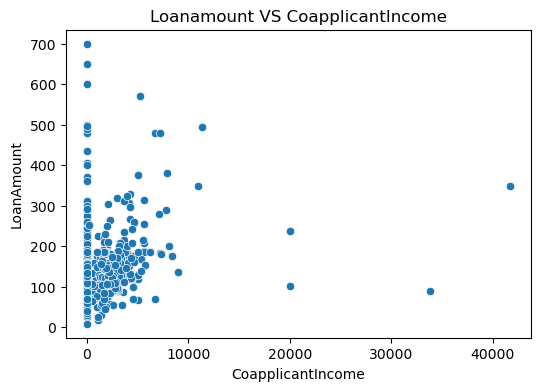

In [37]:
plt.figure(figsize=(6,4))
plt.title("Loanamount VS CoapplicantIncome")
sns.scatterplot(y='LoanAmount',x='CoapplicantIncome',data=df_loan)

From the above plot, we see that people who have income between 0-10000 takes more loan and people who have income more then 10000 took almost no loan.

In [38]:
#splitting the data into separate groups
df4_loan=df_loan.groupby('Dependents')['LoanAmount'].apply(lambda x:x.mean())
df4_loan=df4_loan.reset_index()
df4_loan=df4_loan.sort_values(by=('LoanAmount'),ascending=False)

df5_loan=df_loan.groupby('Dependents')['CoapplicantIncome'].apply(lambda x:x.mean())
df5_loan=df5_loan.reset_index()
df5_loan=df5_loan.sort_values(by=('CoapplicantIncome'),ascending=False)

df6_loan=df_loan.groupby('Property_Area')['CoapplicantIncome'].apply(lambda x:x.mean())
df6_loan=df6_loan.reset_index()
df6_loan=df6_loan.sort_values(by=('CoapplicantIncome'),ascending=False)

df7_loan=df_loan.groupby('Property_Area')['LoanAmount'].apply(lambda x:x.mean())
df7_loan=df7_loan.reset_index()
df7_loan=df7_loan.sort_values(by=('LoanAmount'),ascending=False)

df8_loan=df_loan.groupby('Gender')['CoapplicantIncome'].apply(lambda x:x.mean())
df8_loan=df8_loan.reset_index()
df8_loan=df8_loan.sort_values(by=('Gender'),ascending=False)

df9_loan=df_loan.groupby('Gender')['LoanAmount'].apply(lambda x:x.mean())
df9_loan=df9_loan.reset_index()
df9_loan=df9_loan.sort_values(by=('Gender'),ascending=False)

df10_loan=df_loan.groupby('Married')['CoapplicantIncome'].apply(lambda x:x.mean())
df10_loan=df10_loan.reset_index()
df10_loan=df10_loan.sort_values(by=('Married'),ascending=False)

df11_loan=df_loan.groupby('Married')['LoanAmount'].apply(lambda x:x.mean())
df11_loan=df11_loan.reset_index()
df11_loan=df11_loan.sort_values(by=('Married'),ascending=False)

df12_loan=df_loan.groupby('Education')['CoapplicantIncome'].apply(lambda x:x.mean())
df12_loan=df12_loan.reset_index()
df12_loan=df12_loan.sort_values(by=('Education'),ascending=False)

df13_loan=df_loan.groupby('Education')['LoanAmount'].apply(lambda x:x.mean())
df13_loan=df13_loan.reset_index()
df13_loan=df13_loan.sort_values(by=('Education'),ascending=False)

df14_loan=df_loan.groupby('Self_Employed')['CoapplicantIncome'].apply(lambda x:x.mean())
df14_loan=df14_loan.reset_index()
df14_loan=df14_loan.sort_values(by=('Self_Employed'),ascending=False)

df15_loan=df_loan.groupby('Self_Employed')['LoanAmount'].apply(lambda x:x.mean())
df15_loan=df15_loan.reset_index()
df15_loan=df15_loan.sort_values(by=('Self_Employed'),ascending=False)

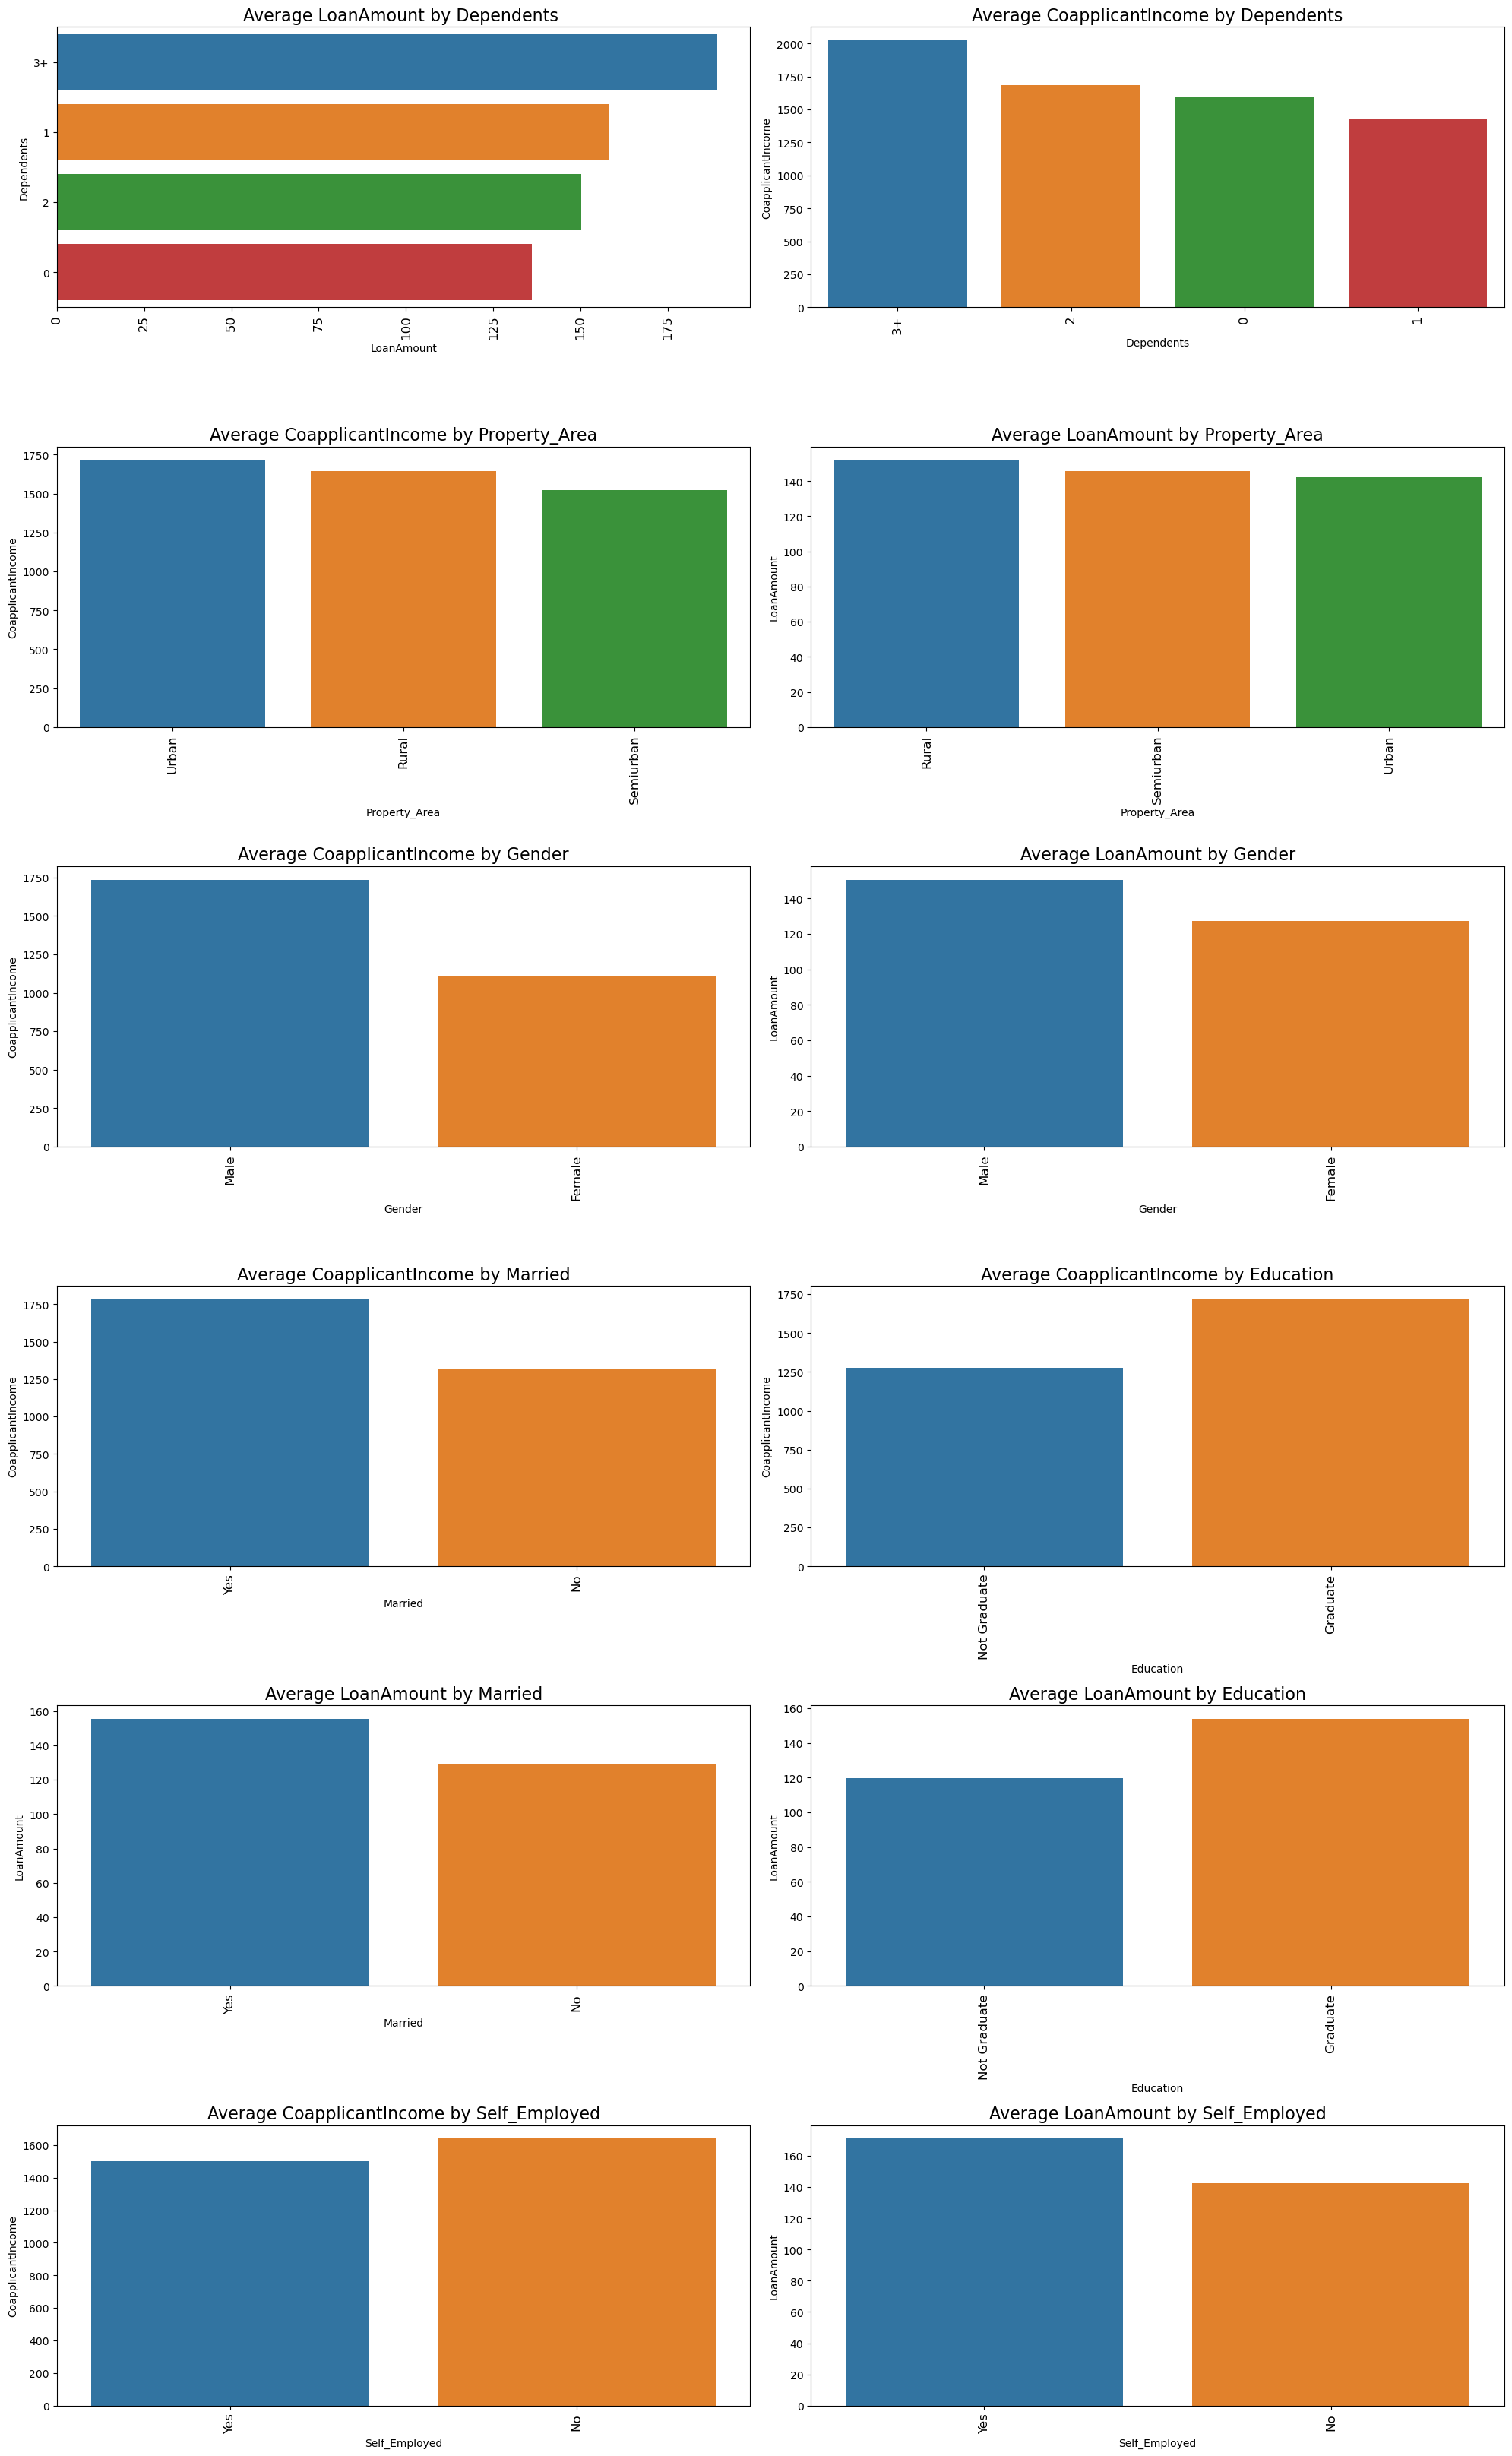

In [39]:
#Plotting barplots for the data splitted into groups
plt.figure(figsize=(20,65))
plt.subplot(12,2,1)
sns.barplot(y='Dependents',x='LoanAmount',data=df4_loan.head(20))
plt.title("Average LoanAmount by Dependents ",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,2)
sns.barplot(x='Dependents',y='CoapplicantIncome',data=df5_loan.head(20))
plt.title("Average CoapplicantIncome by Dependents",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,3)
sns.barplot(x='Property_Area',y='CoapplicantIncome',data=df6_loan.head(20))
plt.title("Average CoapplicantIncome by Property_Area",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,4)
sns.barplot(x='Property_Area',y='LoanAmount',data=df7_loan.head(20))
plt.title("Average LoanAmount by Property_Area",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,5)
sns.barplot(x='Gender',y='CoapplicantIncome',data=df8_loan.head(20))
plt.title("Average CoapplicantIncome by Gender",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,6)
sns.barplot(x='Gender',y='LoanAmount',data=df9_loan.head(20))
plt.title("Average LoanAmount by Gender",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,7)
sns.barplot(x='Married',y='CoapplicantIncome',data=df10_loan.head(20))
plt.title("Average CoapplicantIncome by Married",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,8)
sns.barplot(x='Education',y='CoapplicantIncome',data=df12_loan.head(20))
plt.title("Average CoapplicantIncome by Education",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,9)
sns.barplot(x='Married',y='LoanAmount',data=df11_loan.head(20))
plt.title("Average LoanAmount by Married",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,10)
sns.barplot(x='Education',y='LoanAmount',data=df13_loan.head(20))
plt.title("Average LoanAmount by Education",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,11)
sns.barplot(x='Self_Employed',y='CoapplicantIncome',data=df14_loan.head(20))
plt.title("Average CoapplicantIncome by Self_Employed",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(12,2,12)
sns.barplot(x='Self_Employed',y='LoanAmount',data=df15_loan.head(20))
plt.xticks(rotation=90,fontsize=12)
plt.title("Average LoanAmount by Self_Employed",fontsize=16)
plt.tight_layout()

From the above plots, we can easily see the average value related to loanamount, coapplicantincome, and applicantincome with all the features in dataset

## Encoding

In [40]:
df_loan['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [41]:
df_loan['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [42]:
df_loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [43]:
df_loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [44]:
df_loan['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
df_loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [46]:
df_loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [47]:
#using labelencoder to transform the 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_loan['Gender']=le.fit_transform(df_loan['Gender'])
df_loan['Married']=le.fit_transform(df_loan['Married'])
df_loan['Education']=le.fit_transform(df_loan['Education'])
df_loan['Self_Employed']=le.fit_transform(df_loan['Self_Employed'])
df_loan['Property_Area']=le.fit_transform(df_loan['Property_Area'])
df_loan['Loan_Status']=le.fit_transform(df_loan['Loan_Status'])

In [48]:
df_loan['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [49]:
df_loan['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [50]:
df_loan['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [51]:
df_loan['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [52]:
df_loan['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [53]:
df_loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [54]:
df_loan['Dependents']=df_loan['Dependents'].replace({'3+':'3'})

In [55]:
df_loan['Dependents']=df_loan['Dependents'].astype(int)

In [56]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Multivariate Analysis:

In [57]:
#Checking Correlation
df_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


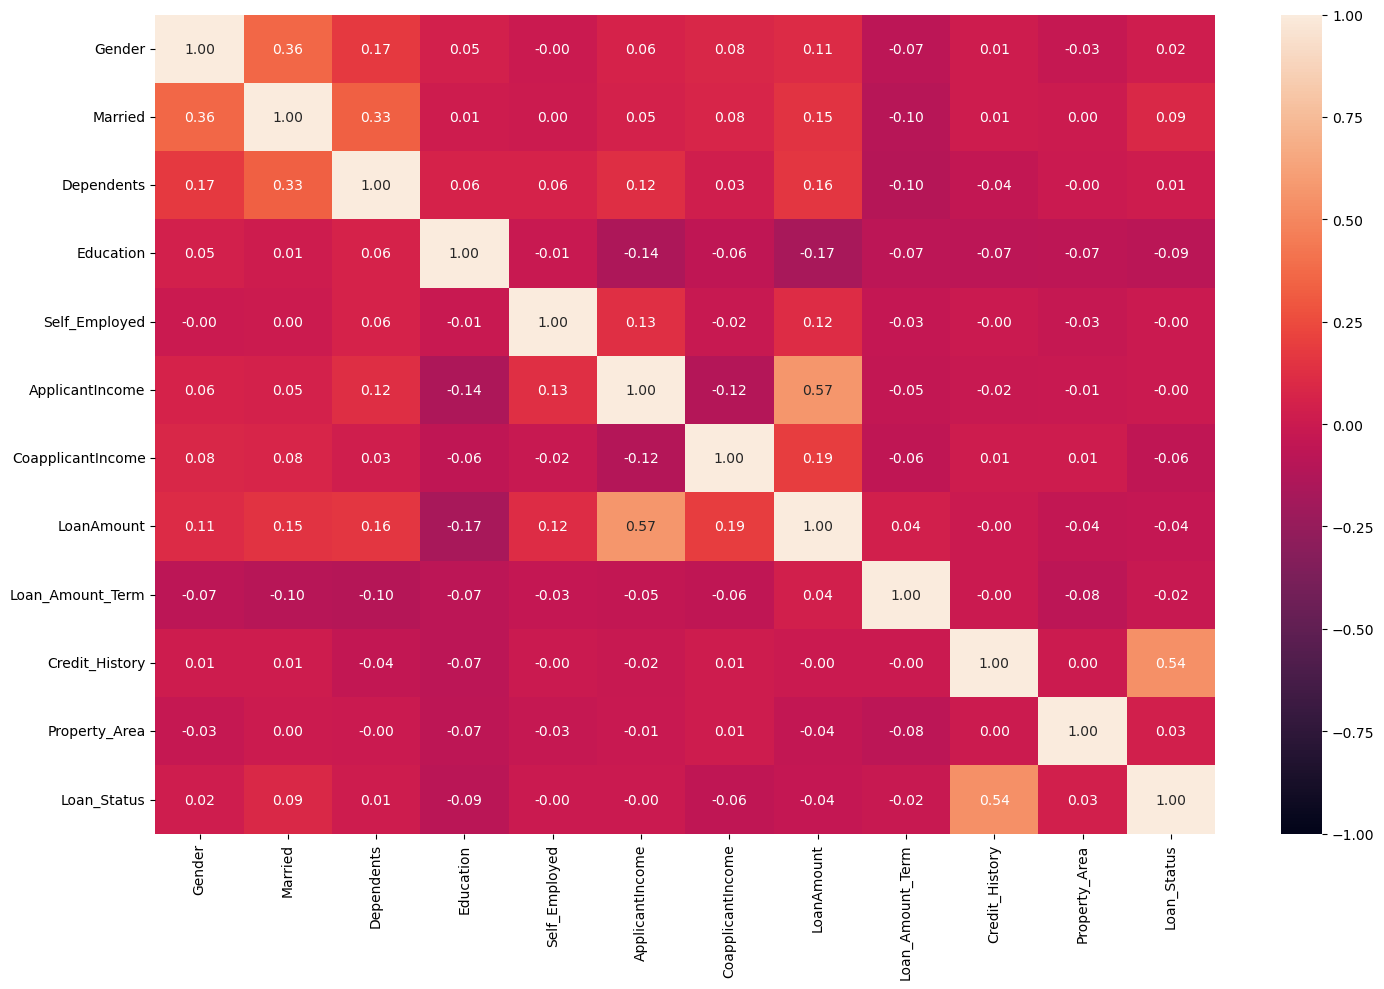

In [58]:
df_correlation = df_loan.corr()

plt.figure(figsize = (15,10))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True, fmt='.2f')
plt.tight_layout()

From heatmap above we see that there are some columns that have good correlation like applicantincome, loanamount,married and there are some columns that have less correlation.

## Preparation for model building

In [59]:
x=df_loan.drop('Loan_Status',axis=1)
y=df_loan['Loan_Status']

## Checking outliers using boxplot:

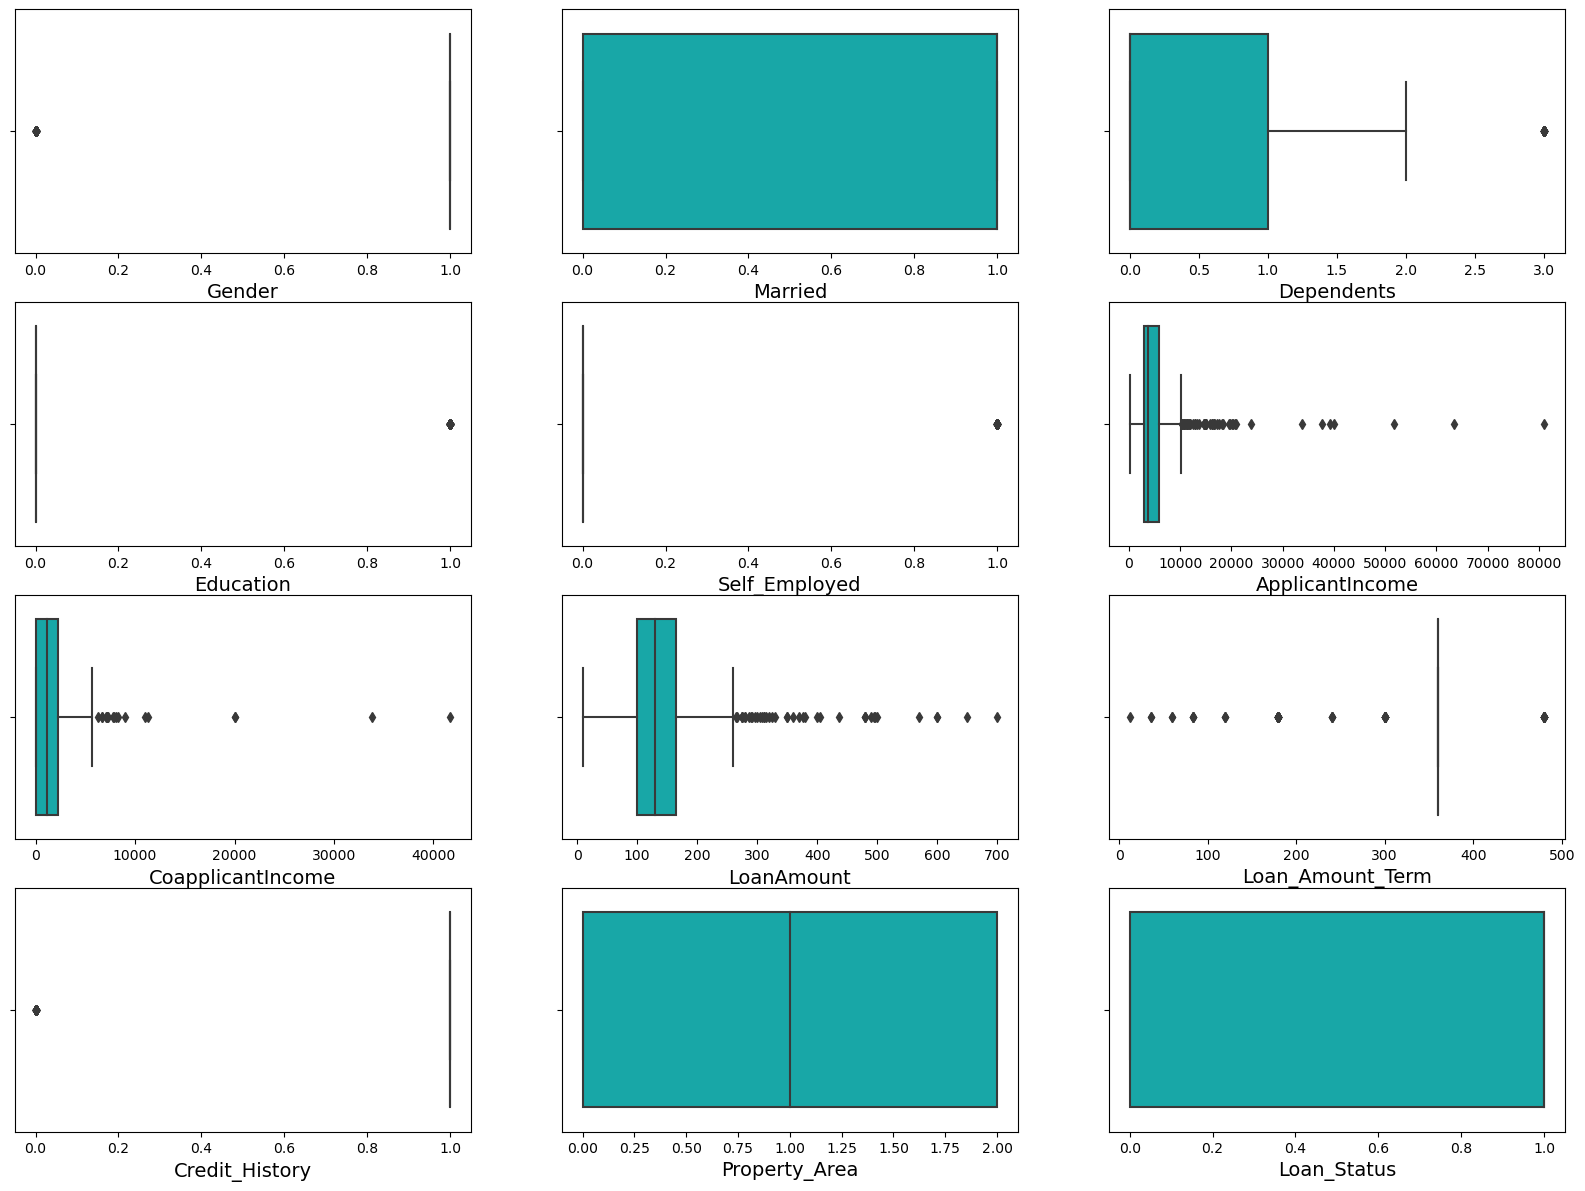

In [60]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in df_loan:
    if plot_number <= 14: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(df_loan[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in most of the columns.

## Remove outliers:

In [61]:
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]
    

Here we have removed the outliers with the percentile method.

## Resolving the class imbalance issue in the target column using SMOTE method:

Our dataset contains imbalanced data so we are going to use SMOTE technique to balance the imbalnced data.

In [62]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Loan_Status'])

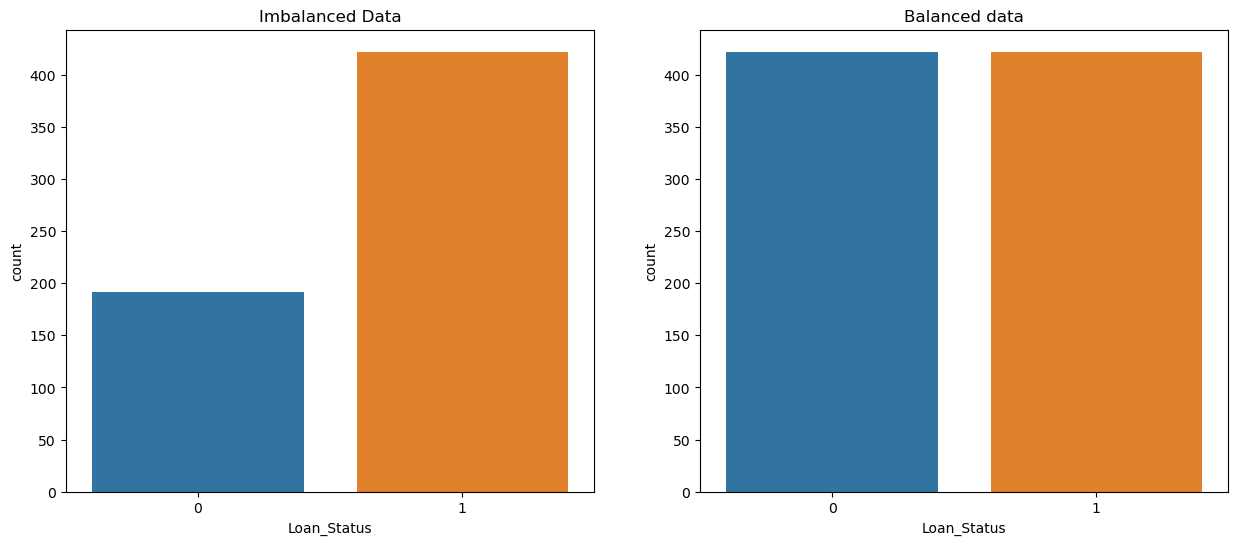

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df_loan['Loan_Status'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Loan_Status'])
plt.title("Balanced data")
plt.show()

Data has been balanced so now our model can predict every class with good accuracy.

In [64]:
#checking the shape of data before and after balancing
print(df_loan.shape)
print(x_new.shape)

(614, 12)
(844, 11)


## Checking skewness:

In [65]:
x_new.skew()

Gender              -1.231662
Married             -0.263374
Dependents           1.173790
Education            1.636962
Self_Employed        2.636686
ApplicantIncome      2.277807
CoapplicantIncome    1.367939
LoanAmount           1.710290
Loan_Amount_Term    -2.251906
Credit_History      -1.335637
Property_Area        0.135934
dtype: float64

We see that there is skewed data present, so we will be removing it now.

In [66]:
#removing skewness using power transform method
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [67]:
#checking skewness after removal
x_new.skew()

Gender              -1.231662
Married             -0.263374
Dependents           0.520203
Education            1.636962
Self_Employed        2.636686
ApplicantIncome     -0.009056
CoapplicantIncome   -0.079100
LoanAmount           0.002923
Loan_Amount_Term     0.479183
Credit_History      -1.143083
Property_Area       -0.087255
dtype: float64

Not entirely, but we removed skewness upto certain level.

## Feature Scaling:

In [68]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

We are scaling the feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

## Training multiple models:

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [70]:
models_classification={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [71]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred_rfc = rfc.predict(x_test)
    acc=accuracy_score(y_test,pred_rfc)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.9171597633136095 on Random_state  45


In [72]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=45)

## Finding the best model:

---------------------- LogisticRegression --------------------------
Accuracy_Score 0.8106508875739645
SCORE 0.8106508875739645
Confusion metrics
[[52 23]
 [ 9 85]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        75
           1       0.79      0.90      0.84        94

    accuracy                           0.81       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.82      0.81      0.81       169

Cross_Val_Score 0.7701958298112144
ROC AUC CURVE


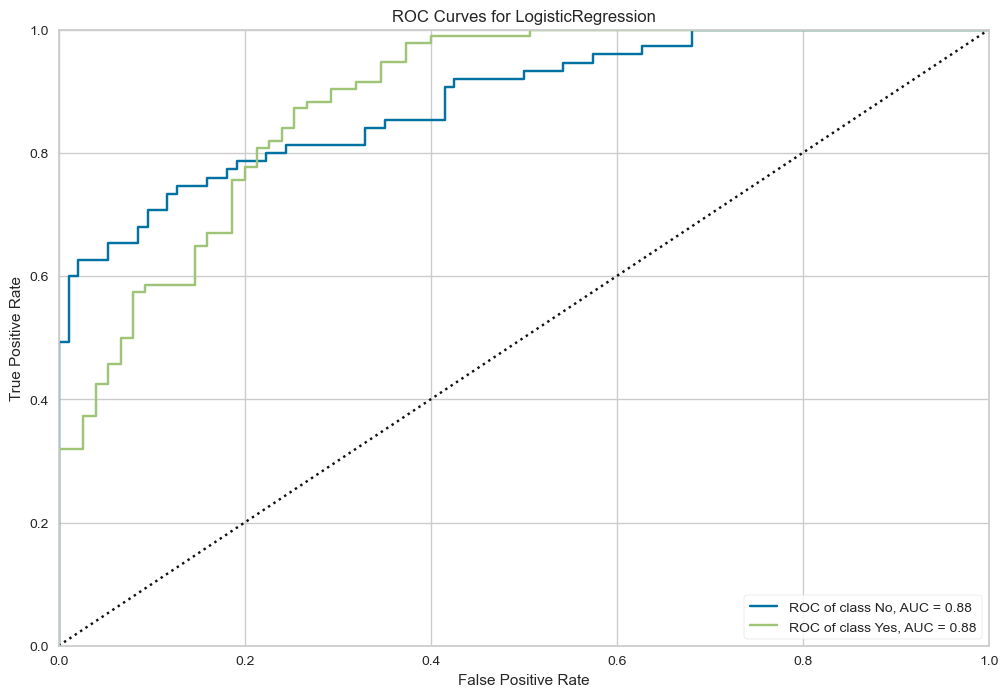

MODEL LEARNING CURVE


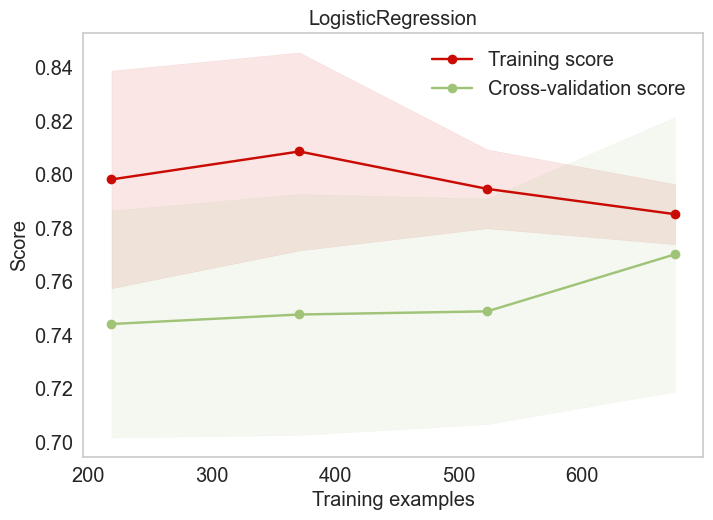

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.7869822485207101
SCORE 0.7869822485207101
Confusion metrics
[[63 12]
 [24 70]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        75
           1       0.85      0.74      0.80        94

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.80      0.79      0.79       169

Cross_Val_Score 0.7607354184277261
ROC AUC CURVE


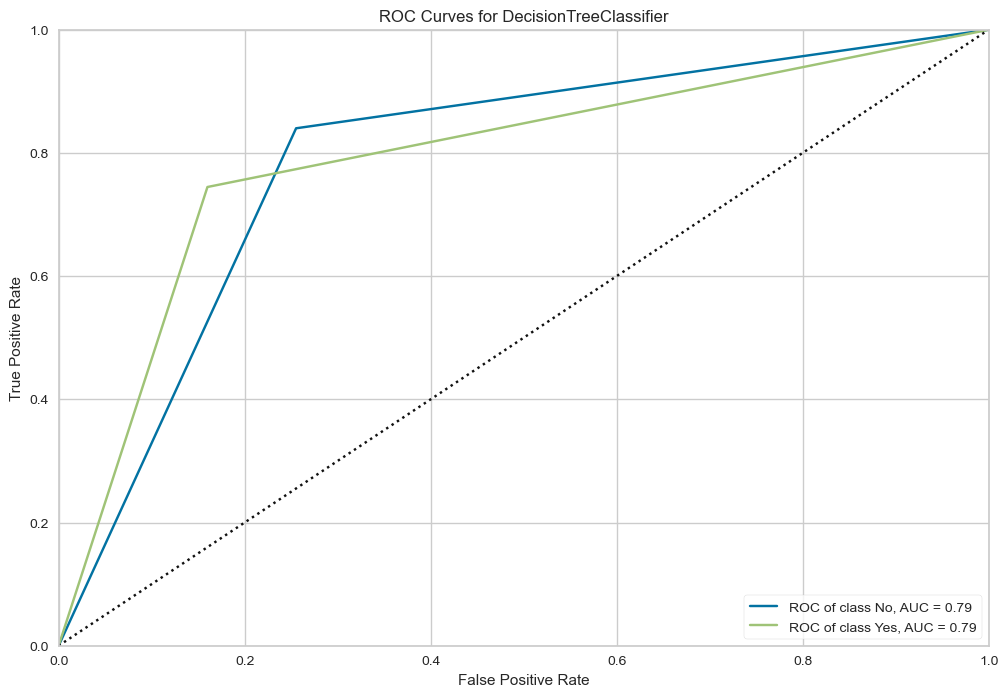

MODEL LEARNING CURVE


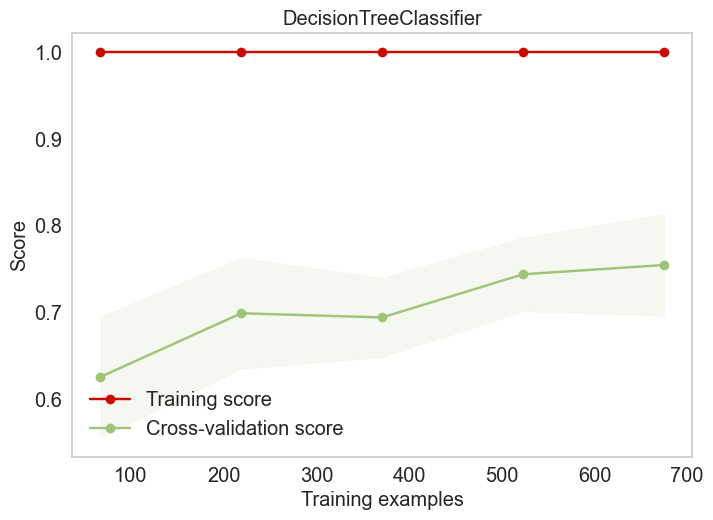

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.893491124260355
SCORE 0.893491124260355
Confusion metrics
[[64 11]
 [ 7 87]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        75
           1       0.89      0.93      0.91        94

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169

Cross_Val_Score 0.815257819103973
ROC AUC CURVE


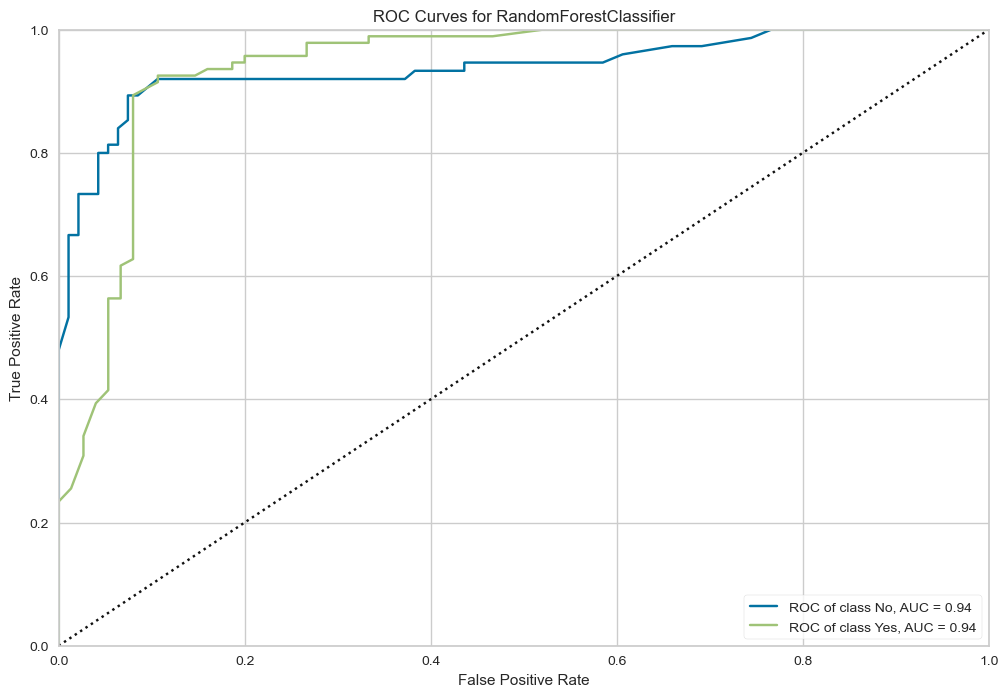

MODEL LEARNING CURVE


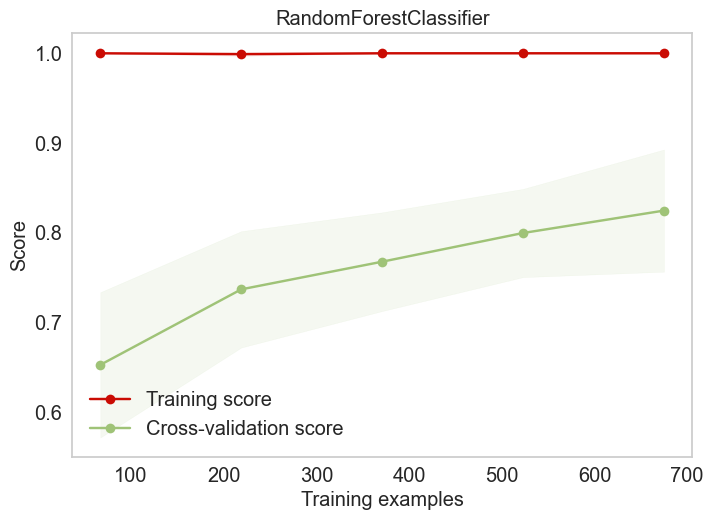

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.8106508875739645
SCORE 0.8106508875739645
Confusion metrics
[[58 17]
 [15 79]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        75
           1       0.82      0.84      0.83        94

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169

Cross_Val_Score 0.7939067342913497
ROC AUC CURVE


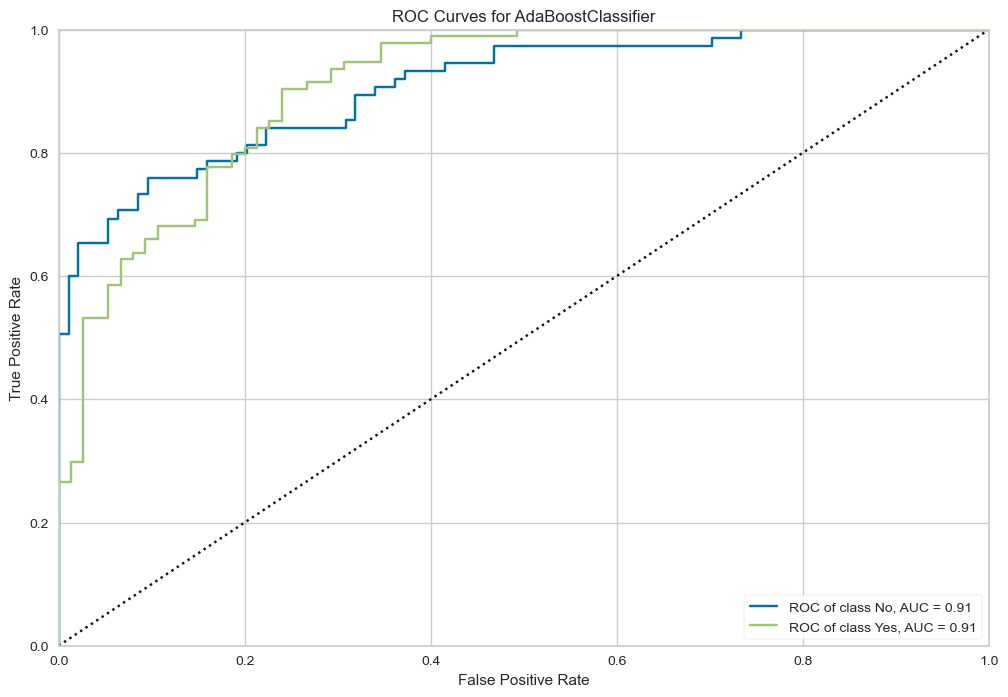

MODEL LEARNING CURVE


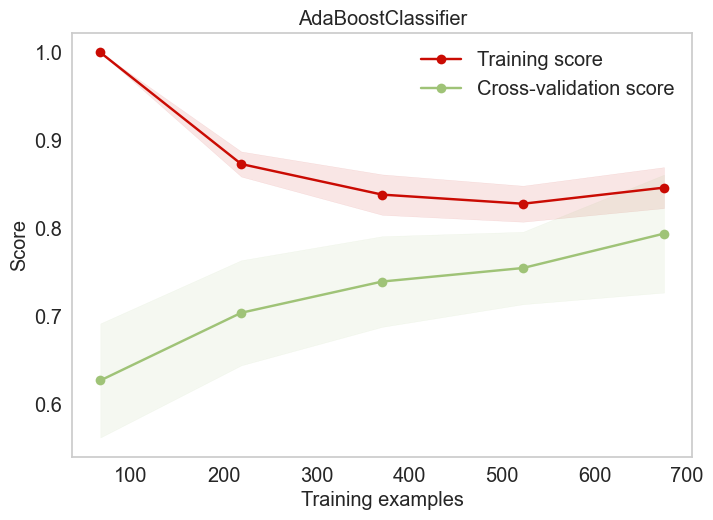

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.8698224852071006
SCORE 0.8698224852071006
Confusion metrics
[[65 10]
 [12 82]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.89      0.87      0.88        94

    accuracy                           0.87       169
   macro avg       0.87      0.87      0.87       169
weighted avg       0.87      0.87      0.87       169

Cross_Val_Score 0.8034164553395323
ROC AUC CURVE


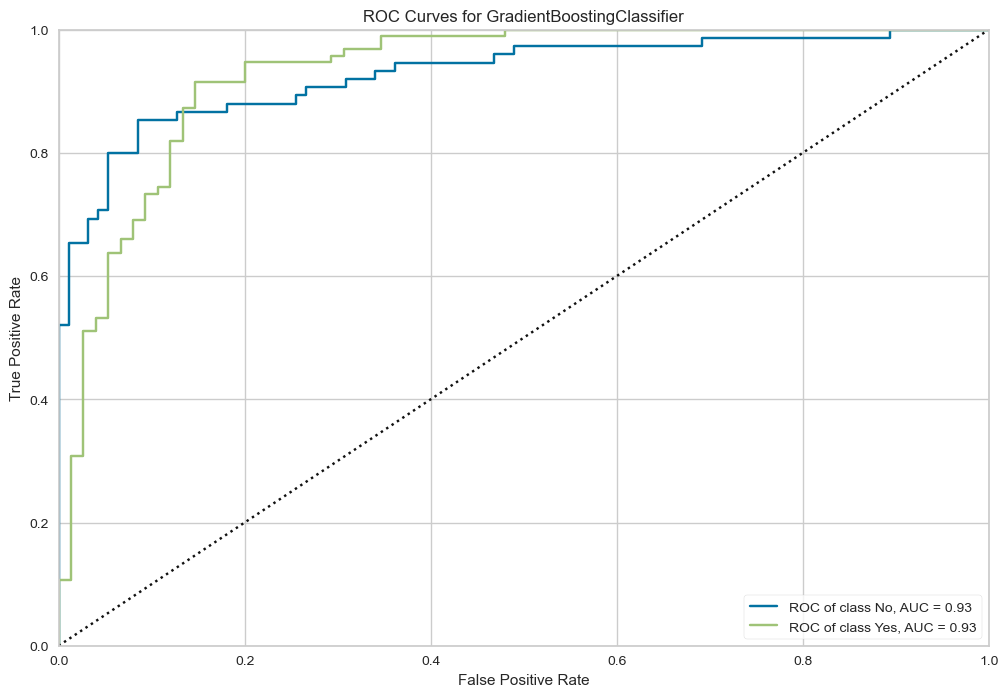

MODEL LEARNING CURVE


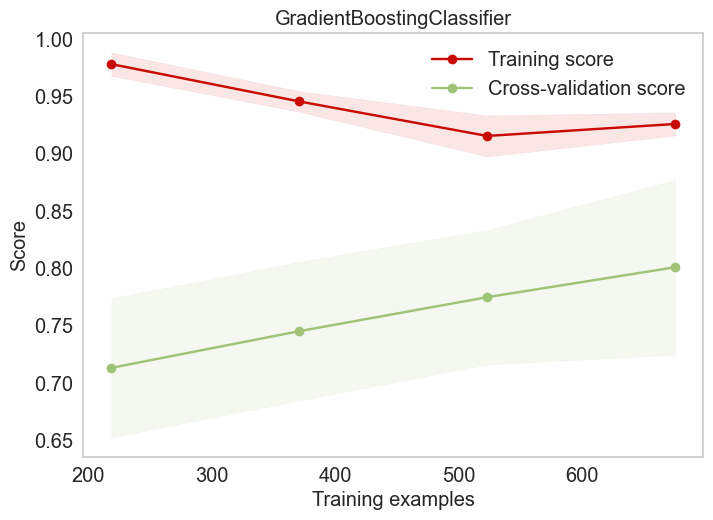

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8520710059171598
SCORE 0.8520710059171598
Confusion metrics
[[55 20]
 [ 5 89]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        75
           1       0.82      0.95      0.88        94

    accuracy                           0.85       169
   macro avg       0.87      0.84      0.85       169
weighted avg       0.86      0.85      0.85       169

Cross_Val_Score 0.7844392786700479
ROC AUC CURVE


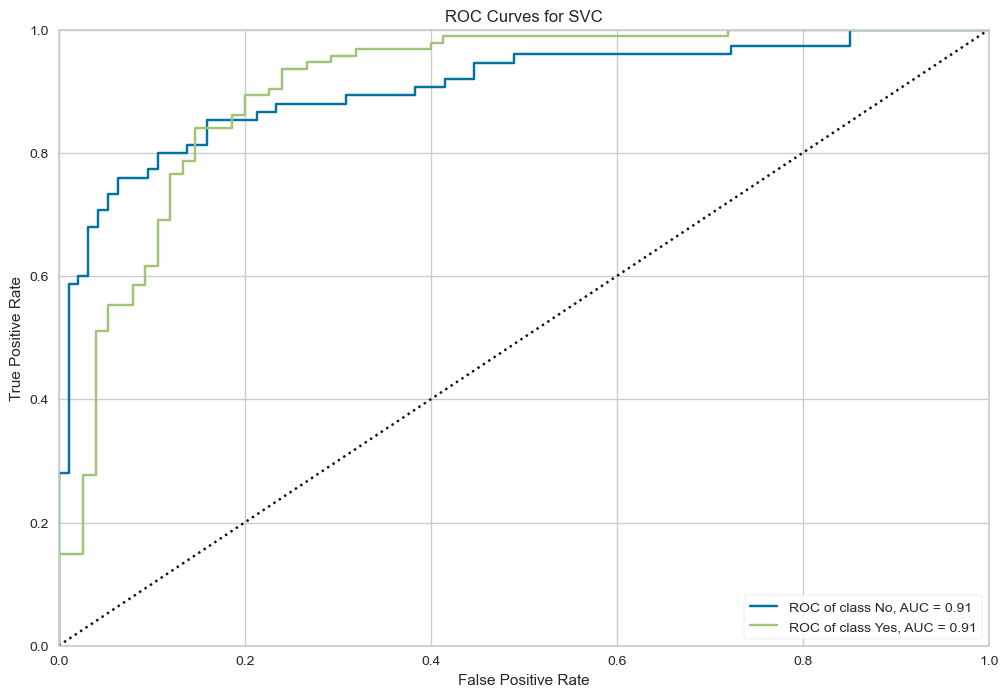

MODEL LEARNING CURVE


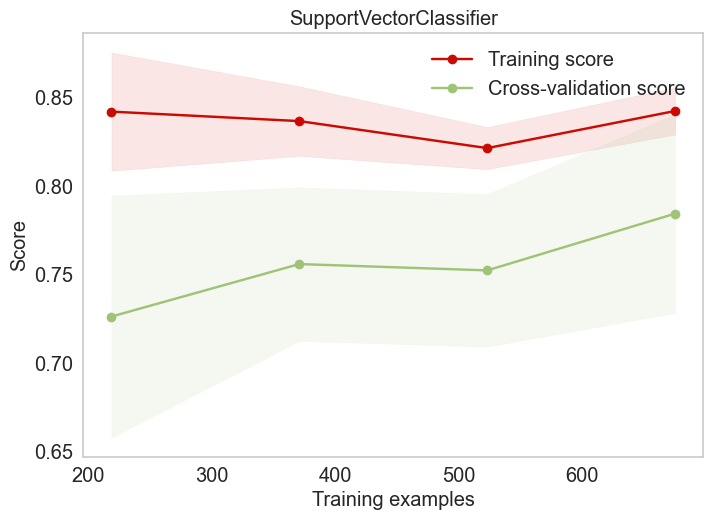

In [73]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [74]:
#making a dataframe of the models
models_df=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_df

,Models,Accuracy Score,Cross_val_score
0,LogisticRegression,0.810651,77.019583
1,DecisionTreeClassifier,0.786982,76.073542
2,RandomForestClassifier,0.893491,81.525782
3,AdaBoostClassifier,0.810651,79.390673
4,GradientBoostingClassifier,0.869822,80.341646
5,SupportVectorClassifier,0.852071,78.443928


## We are selecting RandomForestClassifier as our best model since it is giving good cross_val_score of 0.81 as compared to other models.

## Hyperparameter tuning our best ML model:

In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
param_class={
 'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]}

In [78]:
Grid_classifier=GridSearchCV(estimator=rfc,param_grid=param_class,cv=5)

In [79]:
Grid_classifier.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [80]:
Grid_classifier.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [81]:
Grid_classifier.best_score_

0.8259298393913779

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 82.59%

## Final Model Learning Curve:

In [82]:
rfcr=RandomForestClassifier(
bootstrap= False,
 criterion= 'gini',
 max_depth= None,
 max_features= 'auto',
 max_samples= None,
 min_samples_leaf= 2,
 min_samples_split= 3)

## Cross Validation Score of Final Model:

In [83]:
new_cross_validation=cross_val_score(rfcr,x_new,y_new,cv=5).mean()
new_cross_validation

0.8164694280078896

In [84]:
rfcr.fit(x_train,y_train)
pred_rfcr=rfcr.predict(x_test)
print(accuracy_score(y_test,pred_rfcr))

0.8816568047337278


## ROC AUC Curve of Final ML Model:

ROC AUC CURVE


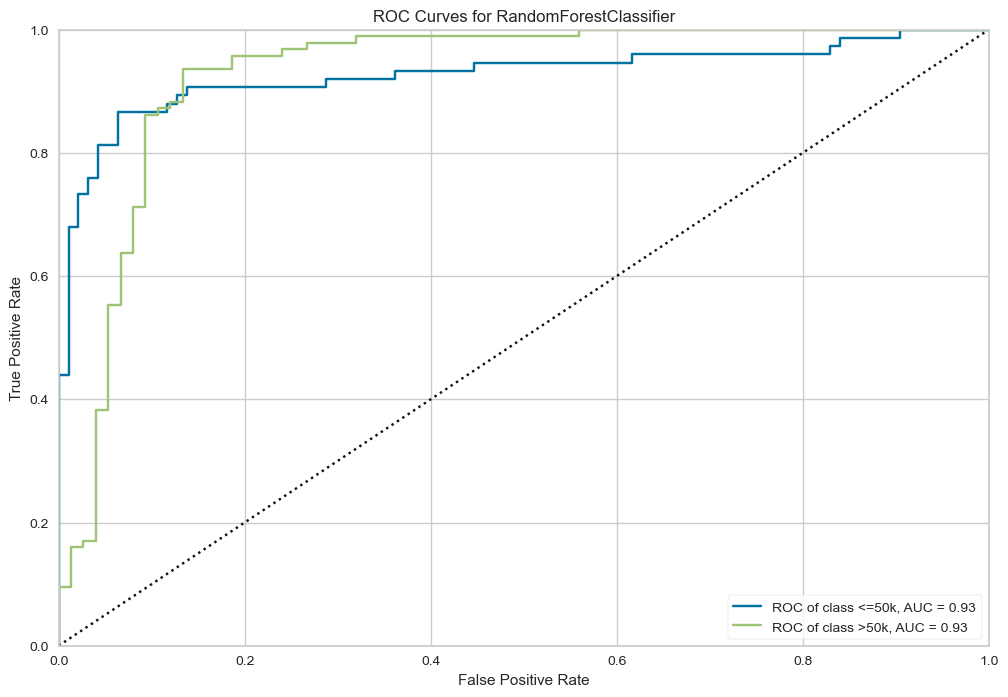

MODEL LEARNING CURVE


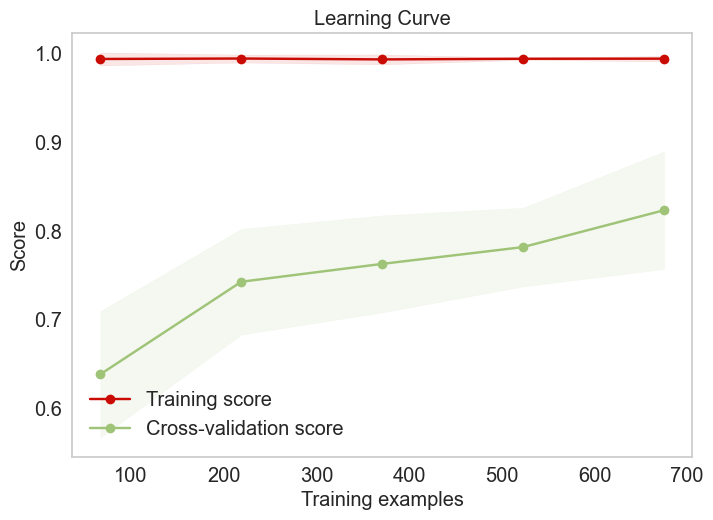

In [91]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(rfcr,x_train,y_train,X_test=x_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(rfcr,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 93% for both Yes or No class.

## Final Model Metrics:

In [92]:
print("Confusion Matrix")
print(confusion_matrix(y_test,pred_rfcr))
print("Classification_Report")
print(classification_report(y_test,pred_rfcr))
print("Accuracy Score",accuracy_score(y_test,pred_rfcr))

Confusion Matrix
[[61 14]
 [ 6 88]]
Classification_Report
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        75
           1       0.86      0.94      0.90        94

    accuracy                           0.88       169
   macro avg       0.89      0.87      0.88       169
weighted avg       0.88      0.88      0.88       169

Accuracy Score 0.8816568047337278


## The Accuracy score of final classification model is 88.16%

## Saving the model:

In [93]:
import joblib
joblib.dump(rfcr,"Loan_Classification_Model.obj")

['Loan_Classification_Model.obj']

## Loading the model:

In [94]:
model=joblib.load('Loan_Classification_Model.obj')

In [95]:
model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

## Conclusion

1. In the given dataset, we were required to build a model that can predict that the loan_status like loan should be approved or not.
2. After some initial data analysis, we performed EDA to understand the effect of features on the target column and to understand other related important things.
3. The data was imbalanced so to balance it, we used upsampling SMOTE method.
4. The dataset was very small. If the dataset was large, we could have learn more about the model and accuracy might have increased.
5. In the end, we build a ML model i.e., RandomForestClassifier that was able predict loan status with 84.36% accuracy.